# National Obesity Map 2016
- In this notebook, I made a map to show average obesity rates across US states
- This will help with showing the relationship between restaurants and obesity

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib 
import seaborn as sns
import numpy as np

# Import Data

In [2]:
state_avg = pd.read_csv('../data/Clean Data/state_avg.csv')

In [3]:
state_avg.columns

Index(['state_name', 'gender_pc'], dtype='object')

In [4]:
# create filter named "us_map" for the geometry points of US states
us_map = gpd.read_file('../data/Raw Data/us-states.geojson')
us_map

,id,name,density,geometry
0,01,Alabama,94.650,"POLYGON ((-87.359 35.001, -85.607 34.985, -85...."
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.602 55.118, -131.569 55.2..."
2,04,Arizona,57.050,"POLYGON ((-109.043 37.000, -109.048 31.332, -1..."
3,05,Arkansas,56.430,"POLYGON ((-94.474 36.502, -90.153 36.496, -90...."
4,06,California,241.700,"POLYGON ((-123.233 42.006, -122.379 42.012, -1..."
5,08,Colorado,49.330,"POLYGON ((-107.920 41.004, -105.729 40.998, -1..."
6,09,Connecticut,739.100,"POLYGON ((-73.054 42.039, -71.799 42.023, -71...."
7,10,Delaware,464.300,"POLYGON ((-75.414 39.804, -75.507 39.684, -75...."
8,11,District of Columbia,10065.000,"POLYGON ((-77.035 38.994, -76.909 38.895, -77...."
9,12,Florida,353.400,"POLYGON ((-85.497 30.998, -85.004 31.003, -84...."


In [5]:
# create filter named "combined_df' to combine US map with the state obesity rates 
combined_df = pd.concat([us_map, state_avg], axis=1)

In [6]:
combined_df

,id,name,density,geometry,state_name,gender_pc
0,01,Alabama,94.650,"POLYGON ((-87.359 35.001, -85.607 34.985, -85....",Alabama,34.775
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.602 55.118, -131.569 55.2...",Alaska,33.150
2,04,Arizona,57.050,"POLYGON ((-109.043 37.000, -109.048 31.332, -1...",Arizona,31.575
3,05,Arkansas,56.430,"POLYGON ((-94.474 36.502, -90.153 36.496, -90....",Arkansas,34.125
4,06,California,241.700,"POLYGON ((-123.233 42.006, -122.379 42.012, -1...",California,30.500
5,08,Colorado,49.330,"POLYGON ((-107.920 41.004, -105.729 40.998, -1...",Colorado,28.925
6,09,Connecticut,739.100,"POLYGON ((-73.054 42.039, -71.799 42.023, -71....",Connecticut,30.875
7,10,Delaware,464.300,"POLYGON ((-75.414 39.804, -75.507 39.684, -75....",Delaware,34.050
8,11,District of Columbia,10065.000,"POLYGON ((-77.035 38.994, -76.909 38.895, -77....",District of Columbia,26.800
9,12,Florida,353.400,"POLYGON ((-85.497 30.998, -85.004 31.003, -84....",Florida,31.600


In [7]:
# get rid of rows with Puerto Rico and Alaska to stay consistent with fast food restaurant map
combined_df=combined_df[~(combined_df['name']=='Puerto Rico')]
combined_df=combined_df[~(combined_df['name']=='Alaska')]

In [8]:
combined_df = combined_df.reset_index(drop = True)

In [9]:
combined_df

,id,name,density,geometry,state_name,gender_pc
0,01,Alabama,94.650,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,34.775
1,04,Arizona,57.050,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",Arizona,31.575
2,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",Arkansas,34.125
3,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",California,30.500
4,08,Colorado,49.330,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",Colorado,28.925
5,09,Connecticut,739.100,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",Connecticut,30.875
6,10,Delaware,464.300,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",Delaware,34.050
7,11,District of Columbia,10065.000,"POLYGON ((-77.03526 38.99387, -76.90929 38.895...",District of Columbia,26.800
8,12,Florida,353.400,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",Florida,31.600
9,13,Georgia,169.500,"POLYGON ((-83.10919 35.00118, -83.32279 34.787...",Georgia,32.900


<AxesSubplot:>

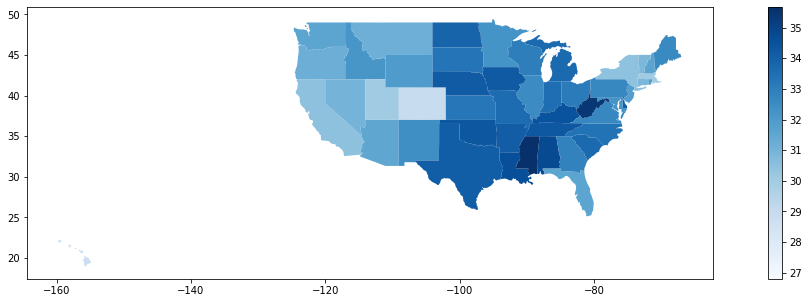

In [10]:
# plot these point on a density map that represents the obesity rates 
combined_df.plot(column='gender_pc', legend=True, figsize=(20,5), cmap='Blues', alpha=5)

These are the obesity rates for 2016. The obesity rate ranges from 27% to 35%. The darker states represent a higher obesity rate while the lighter states represent a lower obesity rates. Wyoming has the highest obesity rate and is shown as a dark shade of blue. Alabama has the lowest obesity rate and is shown as a very light shade of blue